In [1]:
import torch
import pandas as pd
import time
import re
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dev

device(type='cuda')

In [3]:
dev.type


'cuda'

In [4]:
#twits = pd.read_csv('train.csv', engine='python')

In [5]:
#twits[:2]

In [6]:
#twits.shape

In [7]:
# todelete = []
# clines = twits.shape[0]
# # clean twits
# for nline in tqdm(range(clines)):
#     line = twits.iloc[nline,2]
#     line = line.lower()
    
#     # remove &xx
#     line = re.sub(r'&\S*', '', line)
#     # change all @nicks to @twuser
#     line = re.sub(r'@\S*', '@twuser', line)
#     # change all ......... to ...
#     line = re.sub(r'\.+', '.', line)
#     # remove -*
#     line = re.sub(r'', '', line)
#     # change ))))) -> ) и (((( -> (
#     line = re.sub(r'\)+', '\)', line)
#     line = re.sub(r'\(+', '\(', line)
#     # нафик фигню
#     line = re.sub(r'\\\\[\(\)]', '', line)
#     line = re.sub(r'(\S)\- ', r'\1 ', line)
#     line = re.sub(r'(\S)\- ', r'\1 ', line)
#     line = re.sub(r'[^a-z 0-9\,\.\=\-\(\)\[\]\:\;\'\+]', '', line)    
#     # убрать ссылки
#     line = re.sub(r'http:\S*', '', line)
#     line = re.sub(r'www.\S*', '', line)
#     # убрать много минусов, воскл, вопр знаков
#     line = re.sub(r'[\-]+', '-', line)
#     line = re.sub(r'[\!]+', '!', line)
#     line = re.sub(r'[\?]+', '?', line)
#     # заменить 3 и более символов на один
#     line = re.sub(r'([\S])\1{3,}', r'\1', line)
#     # фигня в начале
#     line = re.sub(r'(^[^\w]+)', '', line)
#     # 2 пробела -> один
#     line = re.sub(r' +', ' ', line)
    
# #     line = re.sub(r'', '', line)
# #     line = re.sub(r'', '', line)
# #     line = re.sub(r'', '', line)
# #     line = re.sub(r'', '', line)
# #     line = re.sub(r'', '', line)
# #     line = re.sub(r'', '', line)
    
#     line = line.strip()
    
#     if len(line) > 0:
#         twits.iloc[nline,2] = line
#     else:
#         todelete.append(nline)
    
# for i in sorted(todelete, reverse = True):
#     twits.drop(twits.index[[i]], inplace = True)
    

In [8]:
line = "this р°р»сњс-рѕрµс† 22"
re.sub(r'[^a-z 0-9\,\.\=\-\(\)\[\]\:\;\'\+]', '', line)

'this - 22'

In [9]:
#twits.to_csv("train_amended.csv", index=False)

In [10]:
twits = pd.read_csv('train_amended.csv', engine='python')

In [11]:
# twits 2 lists
clines = twits.shape[0]
phrases = []
tonality = torch.zeros(clines, dtype=torch.int64).to(dev)


for nline in range(clines):
    phrases.append(twits.iloc[nline,2])
    tonality[nline] = torch.tensor(twits.iloc[nline,1])

In [12]:
type(twits.iloc[nline,1])

numpy.int64

In [13]:
tonality


tensor([0, 0, 1,  ..., 0, 1, 1], device='cuda:0')

In [14]:
text = ' '.join(phrases)
ALL_WORDS = set(text.strip().split(' '))
len(ALL_WORDS)

81544

In [15]:
from collections import Counter

In [16]:
c = Counter(text.split(' '))
c.most_common(10)

[('twuser', 90495),
 ('i', 49058),
 ('the', 29660),
 ('to', 29399),
 ('you', 25321),
 ('a', 22779),
 ('and', 15983),
 ('it', 15475),
 ('my', 13648),
 ('for', 12456)]

In [17]:
len(c.keys())

81544

In [18]:
# удаляем слова с числом повторений меньше 3
todelete = set()
for i, n in c.items():
    if n < 3:
        todelete.add(i)
        
for i in todelete:
    del c[i]

In [19]:
len(c.keys())

18549

In [20]:
twits.shape

(99981, 3)

In [21]:
WORDS_COUNT = len(ALL_WORDS)
ALL_WORDS = set([w for w, _ in c.most_common(WORDS_COUNT)])
INDEX_TO_WORD = ['<pad>', '<miss>'] + list(ALL_WORDS)
len(INDEX_TO_WORD)

18551

In [22]:
WORD_TO_INDEX = {w: i for i, w in enumerate(INDEX_TO_WORD)}
INDEX_TO_WORD[:10]

['<pad>',
 '<miss>',
 'lady,',
 '8.2',
 'tho.',
 "grandma's",
 'mga',
 'random',
 'bees',
 'photobucket']

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([5.6710e+03, 9.2790e+03, 1.6399e+04, 1.0434e+04, 9.6190e+03,
        1.2468e+04, 7.4240e+03, 6.9450e+03, 9.6540e+03, 5.7970e+03,
        3.9990e+03, 2.0730e+03, 1.8900e+02, 2.6000e+01, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.  ,   3.34,   5.68,   8.02,  10.36,  12.7 ,  15.04,  17.38,
         19.72,  22.06,  24.4 ,  26.74,  29.08,  31.42,  33.76,  36.1 ,
         38.44,  40.78,  43.12,  45.46,  47.8 ,  50.14,  52.48,  54.82,
         57.16,  59.5 ,  61.84,  64.18,  66.52,  68.86,  71.2 ,  73.54,
         75.88,  78.22,  80.56

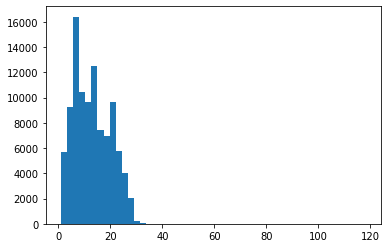

In [24]:
# распреление длины слов в строке
plt.hist([len(s.split(' ')) for s in phrases], bins=50)

In [25]:
MAX_LEN = 35

In [26]:
X = torch.zeros((len(phrases), MAX_LEN), dtype=int)

In [27]:
# готовим матрицу - строка - фраза, столбец - индекс слова в этой позиции
for i in tqdm(range(len(phrases))):
    for j, w in enumerate(phrases[i].split(' ')):
        if j >= MAX_LEN:
            break
        X[i, j] = WORD_TO_INDEX.get(w, WORD_TO_INDEX['<miss>'])

100%|██████████| 99981/99981 [00:13<00:00, 7471.99it/s]


In [28]:
X[0:1]

tensor([[ 6755, 10121, 15689,  3397,  2877,     1, 11993,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0]])

In [29]:
X.shape

torch.Size([99981, 35])

In [30]:
len(tonality)

99981

In [31]:
# train test split
split = 0.2
clines = X.shape[0]
ctrainlines = int( clines * (1-split) )
X_train = X[0:ctrainlines].to(dev)
X_test = X[ctrainlines:].to(dev)
Y_train = tonality[0:ctrainlines].to(dev)
Y_test = tonality[ctrainlines:].to(dev)

In [33]:
class Network(torch.nn.Module):

    def __init__(self, dev, batch_size):
        super(Network, self).__init__()
        self.dev = dev
        self.input_size = len(INDEX_TO_WORD)
        self.embed_size = 200
        self.hidden_size = 128
        self.n_layers = 1
        self.batch_size = batch_size
        self.word_embeddings = torch.nn.Embedding(self.input_size, self.embed_size).to(self.dev)
        self.gru = torch.nn.RNN(self.embed_size, self.hidden_size, num_layers = self.n_layers, nonlinearity = 'relu', batch_first=True).to(self.dev)
        self.hidden2tag = torch.nn.Linear(self.hidden_size*34, 2).to(self.dev)
        self.softmax = torch.nn.LogSoftmax(dim=2).to(self.dev)
        
    def init_hidden(self, batch_size):
        h0 = torch.zeros(self.n_layers*2, batch_size, self.hidden_size)
        c0 = torch.zeros(self.n_layers*2, batch_size, self.hidden_size)
        return h0, c0        

    def forward(self, sentences):
        #self.hidden = self.init_hidden(batch_size)
        embeds = self.word_embeddings(sentences)
        gru_out, hidden = self.gru(embeds)
        gru_out = gru_out.reshape(self.batch_size,1,-1)
        #tag_space = self.hidden2tag(gru_out)
        gru_out = self.hidden2tag(gru_out)
        #gru_out = self.softmax(gru_out)
        return gru_out, hidden


In [34]:
class NetworkGRU(torch.nn.Module):

    def __init__(self, dev, batch_size):
        super(NetworkGRU, self).__init__()
        self.dev = dev
        self.input_size = len(INDEX_TO_WORD)
        self.embed_size = 200
        self.hidden_size = 128
        self.n_layers = 1
        self.batch_size = batch_size
        self.word_embeddings = torch.nn.Embedding(self.input_size, self.embed_size).to(self.dev)
        self.gru = torch.nn.GRU(self.embed_size, self.hidden_size, num_layers = self.n_layers, batch_first=True).to(self.dev)
        self.hidden2tag = torch.nn.Linear(self.hidden_size*34, 2).to(self.dev)

    def forward(self, sentences):
        embeds = self.word_embeddings(sentences)
        gru_out, hidden = self.gru(embeds)
        gru_out = gru_out.reshape(self.batch_size,1,-1)
        gru_out = self.hidden2tag(gru_out)
        return gru_out, hidden


    def forward_state(self, sentences, state):
        embeds = self.word_embeddings(sentences)
        gru_out, state = self.gru(embeds, state)
        tag_space = self.hidden2tag(gru_out.reshape(-1, 128))
        return tag_space.reshape(sentences.shape[0], sentences.shape[1], -1), state

In [35]:
class NetworkLSTM(torch.nn.Module):

    def __init__(self, dev, batch_size):
        super(NetworkLSTM, self).__init__()
        self.dev = dev
        self.input_size = len(INDEX_TO_WORD)
        self.embed_size = 200
        self.hidden_size = 128
        self.n_layers = 1
        self.batch_size = batch_size
        self.word_embeddings = torch.nn.Embedding(self.input_size, self.embed_size).to(self.dev)
        self.gru = torch.nn.LSTM(self.embed_size, self.hidden_size, num_layers = self.n_layers, batch_first=True).to(self.dev)
        self.hidden2tag = torch.nn.Linear(self.hidden_size*34, 2).to(self.dev)

    def forward(self, sentences):
        embeds = self.word_embeddings(sentences)
        gru_out, hidden = self.gru(embeds)
        gru_out = gru_out.reshape(self.batch_size,1,-1)
        gru_out = self.hidden2tag(gru_out)
        return gru_out, hidden

    def forward_state(self, sentences, state):
        embeds = self.word_embeddings(sentences)
        gru_out, state = self.gru(embeds, state)
        tag_space = self.hidden2tag(gru_out.reshape(-1, 128))
        return tag_space.reshape(sentences.shape[0], sentences.shape[1], -1), state

In [36]:
X_train[0:1].shape

torch.Size([1, 35])

In [37]:
len(INDEX_TO_WORD)

18551

In [38]:
bs = 100
model = Network(dev,bs)

In [39]:
modelGRU = NetworkGRU(dev,bs)

In [40]:
modelLSTM = NetworkLSTM(dev,bs)

In [43]:
lrate = 0.1

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lrate)
#optimizer = torch.optim.Adam(model.parameters(), lr=lrate)

criterionGRU = torch.nn.CrossEntropyLoss()
optimizerGRU = torch.optim.SGD(modelGRU.parameters(), lr=lrate)

criterionLSTM = torch.nn.CrossEntropyLoss()
optimizerLSTM = torch.optim.SGD(modelLSTM.parameters(), lr=lrate)

In [75]:
#%%debug
count = 0

for ep in range(500):
    
    # RNN section
    start = time.time()
    train_loss = 0.
    train_passed = 0
    
    for i in range(int(len(X_train) / bs)):
        batch = X_train[i * bs:(i + 1) * bs]
        X_batch = batch[:, :-1]
        Y_batch = Y_train[i * bs:(i + 1) * bs]

        optimizer.zero_grad()
        answers, states = model.forward(X_batch)
        answers = answers.reshape(bs,2)
        loss = criterion(answers, Y_batch)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        train_passed += 1
    end = time.time()
        
    # GRU section
    startGRU = time.time()
    train_lossGRU = 0.
    train_passedGRU = 0
    
    for i in range(int(len(X_train) / bs)):
        batch = X_train[i * bs:(i + 1) * bs]
        X_batch = batch[:, :-1]
        Y_batch = Y_train[i * bs:(i + 1) * bs]

        optimizerGRU.zero_grad()
        answers, states = modelGRU.forward(X_batch)
        answers = answers.reshape(bs,2)
        loss = criterionGRU(answers, Y_batch)
        train_lossGRU += loss.item()

        loss.backward()
        optimizerGRU.step()
        train_passedGRU += 1
    endGRU = time.time()
    
    # LSTM section
    startLSTM = time.time()
    train_lossLSTM = 0.
    train_passedLSTM = 0
    
    for i in range(int(len(X_train) / bs)):
        batch = X_train[i * bs:(i + 1) * bs]
        X_batch = batch[:, :-1]
        Y_batch = Y_train[i * bs:(i + 1) * bs]

        optimizerLSTM.zero_grad()
        answers, states = modelLSTM.forward(X_batch)
        answers = answers.reshape(bs,2)
        loss = criterionLSTM(answers, Y_batch)
        train_lossLSTM += loss.item()

        loss.backward()
        optimizerLSTM.step()
        train_passedLSTM += 1
    endLSTM = time.time()
    
    count += 1
    if count == 1:
        count = 0
        trloss = train_loss / train_passed
        trlossGRU = train_lossGRU / train_passedGRU
        trlossLSTM = train_lossLSTM / train_passedLSTM
        print("Epoch {}. Time,GRU,LSTM: {:.3f},{:.3f},{:.3f}, Train loss,GRU,LSTM: {:.3f},{:.3f},{:.3f}, delta RGU,LSTM:{:.3f},{:.3f}".format(ep, end - start, endGRU - startGRU, endLSTM - startLSTM, trloss, trlossGRU,trlossLSTM, trloss - trlossGRU,trloss - trlossLSTM))
        #print("Epoch {}. Time: {:.3f}, Train loss: {:.3f}, ".format(ep, end - start,  trloss))

Epoch 0. Time,GRU,LSTM: 5.761,6.510,7.011, Train loss,GRU,LSTM: 0.497,0.522,0.553, delta RGU,LSTM:-0.026,-0.057
Epoch 1. Time,GRU,LSTM: 5.750,6.514,7.014, Train loss,GRU,LSTM: 0.473,0.490,0.518, delta RGU,LSTM:-0.017,-0.045
Epoch 2. Time,GRU,LSTM: 5.741,6.515,7.023, Train loss,GRU,LSTM: 0.453,0.459,0.490, delta RGU,LSTM:-0.006,-0.037
Epoch 3. Time,GRU,LSTM: 5.751,6.512,7.022, Train loss,GRU,LSTM: 0.436,0.435,0.468, delta RGU,LSTM:0.001,-0.032
Epoch 4. Time,GRU,LSTM: 5.738,6.521,7.040, Train loss,GRU,LSTM: 0.419,0.412,0.448, delta RGU,LSTM:0.007,-0.029
Epoch 5. Time,GRU,LSTM: 5.747,6.515,7.035, Train loss,GRU,LSTM: 0.403,0.389,0.429, delta RGU,LSTM:0.014,-0.026
Epoch 6. Time,GRU,LSTM: 5.761,6.518,7.048, Train loss,GRU,LSTM: 0.392,0.366,0.411, delta RGU,LSTM:0.027,-0.019
Epoch 7. Time,GRU,LSTM: 5.746,6.533,7.057, Train loss,GRU,LSTM: 0.372,0.342,0.393, delta RGU,LSTM:0.030,-0.021
Epoch 8. Time,GRU,LSTM: 5.751,6.536,7.047, Train loss,GRU,LSTM: 0.359,0.318,0.374, delta RGU,LSTM:0.042,-0.01

KeyboardInterrupt: 

In [76]:
# check accuracy test
count_ok, count_okGRU, count_okLSTM = 0,0,0
count_not, count_notGRU, count_notLSTM = 0,0,0
func_c = torch.nn.LogSoftmax()

for i in range(int(len(X_test) / bs)):
    batch = X_test[i * bs:(i + 1) * bs]
    X_batch = batch[:, :-1]
    Y_batch = Y_test[i * bs:(i + 1) * bs]

    answers, states = model.forward(X_batch)
    answersGRU, states = model.forward(X_batch)
    answersLSTM, states = model.forward(X_batch)
    
    classes = func_c(answers)
    classes = classes.argmax(dim=2)
    classesGRU = func_c(answersGRU)
    classesGRU = classesGRU.argmax(dim=2)
    classesLSTM = func_c(answersLSTM)
    classesLSTM = classesLSTM.argmax(dim=2)
    
    for j in range(bs):
        if classes[j] == Y_batch[j]:
            count_ok += 1
        else:
            count_not += 1
            
        if classesGRU[j] == Y_batch[j]:
            count_okGRU += 1
        else:
            count_notGRU += 1
            
        if classesLSTM[j] == Y_batch[j]:
            count_okLSTM += 1
        else:
            count_notLSTM += 1
            
print ("Accuracy test, RNN, GRU, LSTM:", count_ok/(count_ok + count_not), count_okGRU/(count_okGRU + count_notGRU), count_okLSTM/(count_okLSTM + count_notLSTM))
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy test, RNN, GRU, LSTM: 0.6648743718592964 0.6648743718592964 0.6648743718592964


In [77]:
# check accuracy train
count_ok, count_okGRU, count_okLSTM = 0,0,0
count_not, count_notGRU, count_notLSTM = 0,0,0
func_c = torch.nn.LogSoftmax()

for i in range(int(len(X_train) / bs)):
    batch = X_train[i * bs:(i + 1) * bs]
    X_batch = batch[:, :-1]
    Y_batch = Y_train[i * bs:(i + 1) * bs]

    answers, states = model.forward(X_batch)
    answersGRU, states = model.forward(X_batch)
    answersLSTM, states = model.forward(X_batch)
    
    classes = func_c(answers)
    classes = classes.argmax(dim=2)
    classesGRU = func_c(answersGRU)
    classesGRU = classesGRU.argmax(dim=2)
    classesLSTM = func_c(answersLSTM)
    classesLSTM = classesLSTM.argmax(dim=2)
    
    for j in range(bs):
        if classes[j] == Y_batch[j]:
            count_ok += 1
        else:
            count_not += 1
            
        if classesGRU[j] == Y_batch[j]:
            count_okGRU += 1
        else:
            count_notGRU += 1
            
        if classesLSTM[j] == Y_batch[j]:
            count_okLSTM += 1
        else:
            count_notLSTM += 1
            
print ("Accuracy train, RNN, GRU, LSTM:", count_ok/(count_ok + count_not), count_okGRU/(count_okGRU + count_notGRU), count_okLSTM/(count_okLSTM + count_notLSTM))
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy train, RNN, GRU, LSTM: 0.8967584480600751 0.8967584480600751 0.8967584480600751
